In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from helpers.helper_functions import *

# Handling text 2 exercise
[Handling text exercisses ADApted drom ADA 2018 final exam]

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Task A: Picking up the shovel

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [2]:
!head data/all_scripts.txt

>> Series 01 Episode 01 – Pilot Episode
> A corridor at a sperm bank.
Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.
Leonard: Agreed, what’s your point?
Sheldon: There’s no point, I just think it’s a good idea for a tee-shirt.
Leonard: Excuse me?
Receptionist: Hang on.
Leonard: One across is Aegean, eight down is Nabakov, twenty-six across is MCM, fourteen down is… move your finger… phylum, which makes fourteen across Port-au-Prince. See, Papa Doc’s capital idea, that’s Port-au-Prince. Haiti.
Receptionist: Can I help you?
Leonard: Yes. Um, is this the High IQ sperm bank?


In [3]:
with open('data/all_scripts.txt', encoding='utf8') as f:
    all_scripts = f.read()

In [4]:
def get_episodes(script):
    all_episodes = []
    ep_split = script.split('>>')
    for id_ep, ep in enumerate(ep_split[1:]):
        ep_title, ep_text = ep.split('\n', 1)
        all_episodes.append([id_ep, ep_title, ep_text]) 
    return all_episodes

all_episodes = get_episodes(all_scripts)
print(all_episodes[0][0])
print(all_episodes[0][1])
print(all_episodes[0][2])

0
 Series 01 Episode 01 – Pilot Episode
> A corridor at a sperm bank.
Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.
Leonard: Agreed, what’s your point?
Sheldon: There’s no point, I just think it’s a good idea for a tee-shirt.
Leonard: Excuse me?
Receptionist: Hang on.
Leonard: One across is Aegean, eight down is Nabakov, twenty-six across is MCM, fourteen down is… move your finger… phylum, which makes fourteen across Port-au-Prince. See, Papa Doc’s capital idea, that’s Port-au-Prince. Haiti.
Receptionist: Can I help you?
Leonard: Yes. Um, is this the High IQ sperm bank?
Receptionist: If you have to ask, maybe you shouldn’t be here.
Sheldon: I think this is the place.
Receptionist: Fill these out.
Leonard: Thank-you. We’ll be right back.
Receptioni

In [5]:
def get_scenes(ep_text):
    all_scenes = []
    sc_split = ep_text.split('>')
    for id_sc, sc in enumerate(sc_split[1:]):
        sc_title, sc_text = sc.split('\n', 1)
        all_scenes.append([id_sc, sc_title, sc_text]) 
    return all_scenes

first_ep_scenes = get_scenes(all_episodes[0][2])
print(first_ep_scenes[0][0])
print(first_ep_scenes[0][1])
print(first_ep_scenes[0][2])

0
 A corridor at a sperm bank.
Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.
Leonard: Agreed, what’s your point?
Sheldon: There’s no point, I just think it’s a good idea for a tee-shirt.
Leonard: Excuse me?
Receptionist: Hang on.
Leonard: One across is Aegean, eight down is Nabakov, twenty-six across is MCM, fourteen down is… move your finger… phylum, which makes fourteen across Port-au-Prince. See, Papa Doc’s capital idea, that’s Port-au-Prince. Haiti.
Receptionist: Can I help you?
Leonard: Yes. Um, is this the High IQ sperm bank?
Receptionist: If you have to ask, maybe you shouldn’t be here.
Sheldon: I think this is the place.
Receptionist: Fill these out.
Leonard: Thank-you. We’ll be right back.
Receptionist: Oh, take your time. I’ll just finis

In [6]:
def get_dialogue(sc_text):
    all_lines = []
    line_split = sc_text.split('\n')
    for id_line, line in enumerate(line_split[:-1]):
        speaker, diag = line.split(':', 1)
        all_lines.append([id_line, speaker, diag]) 
    return all_lines

first_scene_diag = get_dialogue(first_ep_scenes[0][2])
print(first_scene_diag[0][0])
print(first_scene_diag[0][1])
print(first_scene_diag[0][2])

# first_ep_scenes[0][2].split('\n')[0].split(':', 1)

0
Sheldon
 So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.


In [7]:
list(map(lambda x: [*x[:2], *get_scenes(x[2])], all_episodes))[0][3]

[1,
 ' The stairs of the apartment building.',
 'Sheldon: Are you still mad about the sperm bank?\nLeonard: No.\nSheldon: You want to hear an interesting thing about stairs?\nLeonard: Not really.\nSheldon: If the height of a single step is off by as little as two millimetres, most people will trip.\nLeonard: I don’t care. Two millimetres? That doesn’t seem right.\nSheldon: No, it’s true, I did a series of experiments when I was twelve, my father broke his clavicle.\nLeonard: Is that why they sent you to boarding school?\nSheldon: No, that was the result of my work with lasers.\nLeonard: New neighbour?\nSheldon: Evidently.\nLeonard: Significant improvement over the old neighbour.\nSheldon: Two hundred pound transvestite with a skin condition, yes she is.\nPenny: Oh, hi!\nLeonard: Hi.\nSheldon: Hi.\nLeonard: Hi.\nSheldon: Hi.\nPenny: Hi?\nLeonard: We don’t mean to interrupt, we live across the hall.\nPenny: Oh, that’s nice.\nLeonard: Oh… uh… no… we don’t live together… um… we live togeth

In [8]:
# episode: [id_ep, ep_title, ep_text]
# scene: [id_sc, sc_title, sc_text]
# line: [id_line, speaker, diag]

lines = []

for id_ep, ep_title, ep_text in all_episodes:
    for id_sc, sc_title, sc_text in get_scenes(ep_text):
        for id_line, speaker, diag in get_dialogue(sc_text):
            lines.append([id_ep, ep_title, id_sc, sc_title, id_line, speaker, diag])

dialogue = pd.DataFrame(lines, columns=
        ['episode_id',
        'episode_title',
        'scene_id',
        'scene_text',
        'line_id',
        'speaker',
        'line'
        ])

dialogue.sample(10)

,episode_id,episode_title,scene_id,scene_text,line_id,speaker,line
18003,78,Series 04 Episode 16 – The Cohabitation Formu...,4,The Cheesecake Factory.,3,Priya,"Hi, Howard. Hi, Sheldon."
33450,151,Series 07 Episode 17 – The Friendship Turbulence,9,Bernadette’s car.,14,Howard,Buzz Aldrin.
32447,147,Series 07 Episode 13 – The Occupation Recalib...,3,Amy’s laboratory.,12,Howard,You’re both into rock?
25932,115,Series 06 Episode 05 – The Holographic Excita...,10,The comic book store.,29,Howard,Then why are you trying to take this away fro...
47403,213,Series 10 Episode 07 – The Veracity Elasticity,5,Sheldon and Amy’s bedroom.,15,Sheldon,"Do you know 2001: A Space Odyssey? All right,..."
37405,169,Series 08 Episode 11 – The Clean Room Infiltr...,7,A shopping mall.,5,Sheldon,"I do. Now, let’s find the kind of gift that m..."
13740,60,Series 03 Episode 21 – The Plimpton Stimulation,4,Sheldon’s bedroom.,1,Elizabeth,Good to know.
3354,13,Series 01 Episode 14 – The Nerdvana Annihilation,5,"Later that night, Leonard is sitting in the t...",20,Sheldon,I disagree. Your inability to successfully wo...
14421,63,Series 04 Episode 01 – The Robotic Manipulation,0,The apartment. A robotic arm is extracting so...,18,Penny,All right. Pass the soy sauce.
6460,26,Series 02 Episode 10 – The Vartabedian Conundrum,8,The university cafeteria.,13,Leonard,"Yeah, good for me. I’ll never have sex again...."


**Q2**. Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

In [9]:
all_characters = dialogue.speaker.unique()
recurrent_characters = dialogue.speaker.value_counts().loc[lambda x: x>= 90]
print(recurrent_characters)
recurrent_characters.drop('Man', inplace=True)

Sheldon         11687
Leonard          9829
Penny            7677
Howard           5872
Raj              4779
Amy              3471
Bernadette       2689
Stuart            733
Priya             222
Mrs Cooper        213
Emily             164
Beverley          162
Mrs Wolowitz      136
Zack              135
Arthur            130
Wil               126
Leslie            116
Kripke            106
Man               105
Bert               95
Name: speaker, dtype: int64


In [10]:
df = dialogue[dialogue['speaker'].isin(recurrent_characters.index)]
df.sample(10)

,episode_id,episode_title,scene_id,scene_text,line_id,speaker,line
15809,68,Series 04 Episode 06 – The Irish Pub Formulation,5,Leonard’s car.,28,Leonard,"Because, well, Batman has the secret."
42937,194,Series 09 Episode 12 – The Sales Call Sublima...,8,The apartment.,13,Raj,"Wait, what happened to us?"
15475,67,Series 04 Episode 05 – The Desperation Emanation,1,The comic book store.,24,Leonard,Because I don’t need his girlfriend to set me...
6932,29,Series 02 Episode 13 – The Friendship Algorithm,1,The apartment.,0,Leonard,There you go. Now any e-mail from Wolowitz wi...
2590,10,Series 01 Episode 11 – The Pancake Batter Ano...,3,Howard’s bedroom. The phone is ringing.,31,Leonard,"Five movies, two hours apiece. It’s a start."
50842,229,Series 10 Episode 23 – The Gyroscopic Collapse,0,The apartment.,6,Amy,"You know, it’s nice of you to acknowledge us,..."
35998,163,Series 08 Episode 05 – The Focus Attenuation,2,The apartment.,6,Sheldon,"Yeah, one would assume, on getting out of the..."
49156,221,Series 10 Episode 15 – The Locomotion Reverbe...,6,Penny’s car.,17,Bernadette,"Stuart, don’t you drink my milk."
46561,210,Series 10 Episode 04 – The Cohabitation Exper...,1,The apartment.,28,Sheldon,Yes. I accept this five-week mission to share...
3480,14,Series 01 Episode 15 – The Porkchop Indetermi...,1,The same.,1,Howard,"Was it perhaps destiny, I think it was destiny."


## Task B: Read the scripts carefully

### Part 1: Don't put the shovel down just yet

**Q3**. From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [11]:
replacements = dict.fromkeys(EXCLUDE_CHARS, ' ')

In [12]:
df['line'] = df['line'].apply(lambda s: "".join([replacements.get(c, c) for c in str(s).lower()]))
df.sample(5)['line']

C:\Users\farah\AppData\Local\Temp/ipykernel_27888/4125736312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['line'] = df['line'].apply(lambda s: "".join([replacements.get(c, c) for c in str(s).lower()]))


15794     april 12th  2005  bob s big boy  toluca lake ...
44995     cersei uses her body to manipulate men  penny...
15246     well  you really want to dot the i s and cros...
48772                                right  right  got it 
31073     you think they came up with that  they were g...
Name: line, dtype: object

**Q4**. For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

('so', 'if', 'a', 'photon')
(3187, 2489, 13518, 4)
[   40    84    26 ...  9216 16806 21098]


c:\Users\farah\anaconda3\envs\adaexam\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\farah\anaconda3\envs\adaexam\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\farah\anaconda3\envs\adaexam\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\farah\anaconda3\envs\adaexam\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\farah\anaconda3\envs\adaexam\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  fi

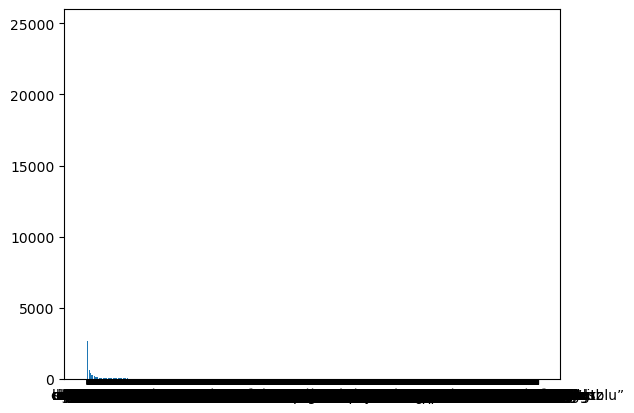

In [13]:
from collections import Counter

vocabulary = [word for line in df.line for word in simple_tokeniser(line)]
word_frequency = Counter(vocabulary)

labels, values = zip(*word_frequency.items())

print(labels[:4])
print(values[:4])

# sort your values in descending order
indSort = np.argsort(values)[::-1]

print(indSort)

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

### Part 2: Talkativity
**Q5**. For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [16]:
df['words_uttered'] = df['line'].apply(lambda x: len(simple_tokeniser(x)))
df[['speaker', 'words_uttered']].groupby('speaker').agg('sum').sort_values(by=['words_uttered'], ascending=False)

C:\Users\farah\AppData\Local\Temp/ipykernel_27888/1404184884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words_uttered'] = df['line'].apply(lambda x: len(simple_tokeniser(x)))


,words_uttered
speaker,
Sheldon,185369
Leonard,102496
Penny,79270
Howard,69505
Raj,60099
Amy,39926
Bernadette,27657
Stuart,7955
Mrs Cooper,3389


## Task D: The Detective's Hat

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high.

**Q6**. Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons.

In [31]:
print(df.iloc[df.shape[0]-1].loc['episode_title'])
test_mask = df['episode_title'].str.contains('Series 10') | df['episode_title'].str.contains('Series 09')
training_df = df[~test_mask]
test_df = df[test_mask]
test_df.sample(5)

 Series 10 Episode 24 – The Long Distance Dissonance


,episode_id,episode_title,scene_id,scene_text,line_id,speaker,line,words_uttered
44146,200,Series 09 Episode 18 – The Application Deteri...,2,The apartment.,7,Howard,i guess that is a way around this you guys w...,17
49167,221,Series 10 Episode 15 – The Locomotion Reverbe...,7,The apartment.,5,Howard,hey i came up with that and hmm you haven t...,13
46476,209,Series 10 Episode 03 – The Dependence Transce...,13,The lab.,24,Amy,bye,1
45999,207,Series 10 Episode 01 – The Conjugal Conjecture,12,The wedding ceremony.,25,Bernadette,anybody have anything snarky to say about tha...,12
46002,207,Series 10 Episode 01 – The Conjugal Conjecture,12,The wedding ceremony.,28,Stuart,that s beautiful,3


**Q7**. Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [42]:
len(set(vocabulary))

21099

In [41]:
len(set(vocabulary) - set([word for line in df[~(df['speaker'].__eq__('Sheldon'))]['line'] for word in simple_tokeniser(line)]))

5542